In [0]:
import torch
import torchvision
import torchvision.datasets as datasets
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import time
from tqdm import tqdm

In [2]:
train = datasets.MNIST('./data', download=True, train=True, transform=None)
test = datasets.MNIST('./data', download=True, train=False, transform=None)

train_x = torch.tensor([[np.array(x)] for x,y in train]).float().cuda()
train_y = torch.tensor([y for x,y in train]).long().cuda()

  0%|          | 0/9912422 [00:00<?, ?it/s]

100%|█████████▉| 9871360/9912422 [00:11<00:00, 995247.81it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



0it [00:00, ?it/s]
32768it [00:00, 357349.07it/s]
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



 95%|█████████▍| 1564672/1648877 [00:02<00:00, 833943.99it/s]
1654784it [00:02, 665611.87it/s]                             
0it [00:00, ?it/s]
8192it [00:00, 153905.62it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


9920512it [00:24, 995247.81it/s]                             

In [0]:
class CNNBareBones(nn.Module):
  def __init__(self):
    super(CNNBareBones, self).__init__()
    self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(4,4, kernel_size=3, stride=1, padding=1)
    self.squash = nn.Linear(4*28*28, 10).cuda()
    
  def forward(self, x):
    a1 = F.relu(self.conv1(x)) 
    a2 = F.relu(self.conv2(a1))
    x = a2.view(-1, 4*28*28)
    out = F.softmax(self.squash(x))
    return out
  
  def train_and_plot(self, train_x, train_y, train_steps = 100):
    losses = []

    # create your optimizer
    lossfunc = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.01)
    timestamp = time.time()

    for i in tqdm(range(train_steps)):
      # reset the gradient buffers
      optimizer.zero_grad()   
      
      # forward pass
      output = net(train_x)
      
      # calculate loss
      loss = lossfunc(output, train_y)
      loss.backward()
      
      # save loss
      losses.append(loss)
      
      # update weights
      optimizer.step()
    plt.plot(losses)
    plt.show()
    plt.close()
    
    print('Finished in {0}s'.format(time.time() - timestamp))
  


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':

100%|██████████| 100/100 [01:48<00:00,  1.23s/it]


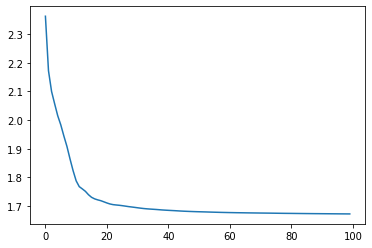

Finished in 123.96543216705322s


In [4]:
net = CNNBareBones().cuda()
net.train_and_plot(train_x, train_y)